In [1]:
import os
os.chdir('/Users/ngdnh/Codespace/PulsatingPulseShop/')
%config InlineBackend.figure_formats = ['svg']

In [2]:
import numpy as np
import utility as ut
import pickle
import datetime 
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gaussian_kde
import qutip as qt
from scipy.optimize import minimize

today = datetime.datetime.now()

print(f'Now is {today}')

Now is 2025-01-03 15:04:15.652760


In [3]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Your Parula color data
cm_data = [[0.2422, 0.1504, 0.6603],
[0.2444, 0.1534, 0.6728],
[0.2464, 0.1569, 0.6847],
[0.2484, 0.1607, 0.6961],
[0.2503, 0.1648, 0.7071],
[0.2522, 0.1689, 0.7179],
[0.254, 0.1732, 0.7286],
[0.2558, 0.1773, 0.7393],
[0.2576, 0.1814, 0.7501],
[0.2594, 0.1854, 0.761],
[0.2611, 0.1893, 0.7719],
[0.2628, 0.1932, 0.7828],
[0.2645, 0.1972, 0.7937],
[0.2661, 0.2011, 0.8043],
[0.2676, 0.2052, 0.8148],
[0.2691, 0.2094, 0.8249],
[0.2704, 0.2138, 0.8346],
[0.2717, 0.2184, 0.8439],
[0.2729, 0.2231, 0.8528],
[0.274, 0.228, 0.8612],
[0.2749, 0.233, 0.8692],
[0.2758, 0.2382, 0.8767],
[0.2766, 0.2435, 0.884],
[0.2774, 0.2489, 0.8908],
[0.2781, 0.2543, 0.8973],
[0.2788, 0.2598, 0.9035],
[0.2794, 0.2653, 0.9094],
[0.2798, 0.2708, 0.915],
[0.2802, 0.2764, 0.9204],
[0.2806, 0.2819, 0.9255],
[0.2809, 0.2875, 0.9305],
[0.2811, 0.293, 0.9352],
[0.2813, 0.2985, 0.9397],
[0.2814, 0.304, 0.9441],
[0.2814, 0.3095, 0.9483],
[0.2813, 0.315, 0.9524],
[0.2811, 0.3204, 0.9563],
[0.2809, 0.3259, 0.96],
[0.2807, 0.3313, 0.9636],
[0.2803, 0.3367, 0.967],
[0.2798, 0.3421, 0.9702],
[0.2791, 0.3475, 0.9733],
[0.2784, 0.3529, 0.9763],
[0.2776, 0.3583, 0.9791],
[0.2766, 0.3638, 0.9817],
[0.2754, 0.3693, 0.984],
[0.2741, 0.3748, 0.9862],
[0.2726, 0.3804, 0.9881],
[0.271, 0.386, 0.9898],
[0.2691, 0.3916, 0.9912],
[0.267, 0.3973, 0.9924],
[0.2647, 0.403, 0.9935],
[0.2621, 0.4088, 0.9946],
[0.2591, 0.4145, 0.9955],
[0.2556, 0.4203, 0.9965],
[0.2517, 0.4261, 0.9974],
[0.2473, 0.4319, 0.9983],
[0.2424, 0.4378, 0.9991],
[0.2369, 0.4437, 0.9996],
[0.2311, 0.4497, 0.9995],
[0.225, 0.4559, 0.9985],
[0.2189, 0.462, 0.9968],
[0.2128, 0.4682, 0.9948],
[0.2066, 0.4743, 0.9926],
[0.2006, 0.4803, 0.9906],
[0.195, 0.4861, 0.9887],
[0.1903, 0.4919, 0.9867],
[0.1869, 0.4975, 0.9844],
[0.1847, 0.503, 0.9819],
[0.1831, 0.5084, 0.9793],
[0.1818, 0.5138, 0.9766],
[0.1806, 0.5191, 0.9738],
[0.1795, 0.5244, 0.9709],
[0.1785, 0.5296, 0.9677],
[0.1778, 0.5349, 0.9641],
[0.1773, 0.5401, 0.9602],
[0.1768, 0.5452, 0.956],
[0.1764, 0.5504, 0.9516],
[0.1755, 0.5554, 0.9473],
[0.174, 0.5605, 0.9432],
[0.1716, 0.5655, 0.9393],
[0.1686, 0.5705, 0.9357],
[0.1649, 0.5755, 0.9323],
[0.161, 0.5805, 0.9289],
[0.1573, 0.5854, 0.9254],
[0.154, 0.5902, 0.9218],
[0.1513, 0.595, 0.9182],
[0.1492, 0.5997, 0.9147],
[0.1475, 0.6043, 0.9113],
[0.1461, 0.6089, 0.908],
[0.1446, 0.6135, 0.905],
[0.1429, 0.618, 0.9022],
[0.1408, 0.6226, 0.8998],
[0.1383, 0.6272, 0.8975],
[0.1354, 0.6317, 0.8953],
[0.1321, 0.6363, 0.8932],
[0.1288, 0.6408, 0.891],
[0.1253, 0.6453, 0.8887],
[0.1219, 0.6497, 0.8862],
[0.1185, 0.6541, 0.8834],
[0.1152, 0.6584, 0.8804],
[0.1119, 0.6627, 0.877],
[0.1085, 0.6669, 0.8734],
[0.1048, 0.671, 0.8695],
[0.1009, 0.675, 0.8653],
[0.0964, 0.6789, 0.8609],
[0.0914, 0.6828, 0.8562],
[0.0855, 0.6865, 0.8513],
[0.0789, 0.6902, 0.8462],
[0.0713, 0.6938, 0.8409],
[0.0628, 0.6972, 0.8355],
[0.0535, 0.7006, 0.8299],
[0.0433, 0.7039, 0.8242],
[0.0328, 0.7071, 0.8183],
[0.0234, 0.7103, 0.8124],
[0.0155, 0.7133, 0.8064],
[0.0091, 0.7163, 0.8003],
[0.0046, 0.7192, 0.7941],
[0.0019, 0.722, 0.7878],
[0.0009, 0.7248, 0.7815],
[0.0018, 0.7275, 0.7752],
[0.0046, 0.7301, 0.7688],
[0.0094, 0.7327, 0.7623],
[0.0162, 0.7352, 0.7558],
[0.0253, 0.7376, 0.7492],
[0.0369, 0.74, 0.7426],
[0.0504, 0.7423, 0.7359],
[0.0638, 0.7446, 0.7292],
[0.077, 0.7468, 0.7224],
[0.0899, 0.7489, 0.7156],
[0.1023, 0.751, 0.7088],
[0.1141, 0.7531, 0.7019],
[0.1252, 0.7552, 0.695],
[0.1354, 0.7572, 0.6881],
[0.1448, 0.7593, 0.6812],
[0.1532, 0.7614, 0.6741],
[0.1609, 0.7635, 0.6671],
[0.1678, 0.7656, 0.6599],
[0.1741, 0.7678, 0.6527],
[0.1799, 0.7699, 0.6454],
[0.1853, 0.7721, 0.6379],
[0.1905, 0.7743, 0.6303],
[0.1954, 0.7765, 0.6225],
[0.2003, 0.7787, 0.6146],
[0.2061, 0.7808, 0.6065],
[0.2118, 0.7828, 0.5983],
[0.2178, 0.7849, 0.5899],
[0.2244, 0.7869, 0.5813],
[0.2318, 0.7887, 0.5725],
[0.2401, 0.7905, 0.5636],
[0.2491, 0.7922, 0.5546],
[0.2589, 0.7937, 0.5454],
[0.2695, 0.7951, 0.536],
[0.2809, 0.7964, 0.5266],
[0.2929, 0.7975, 0.517],
[0.3052, 0.7985, 0.5074],
[0.3176, 0.7994, 0.4975],
[0.3301, 0.8002, 0.4876],
[0.3424, 0.8009, 0.4774],
[0.3548, 0.8016, 0.4669],
[0.3671, 0.8021, 0.4563],
[0.3795, 0.8026, 0.4454],
[0.3921, 0.8029, 0.4344],
[0.405, 0.8031, 0.4233],
[0.4184, 0.803, 0.4122],
[0.4322, 0.8028, 0.4013],
[0.4463, 0.8024, 0.3904],
[0.4608, 0.8018, 0.3797],
[0.4753, 0.8011, 0.3691],
[0.4899, 0.8002, 0.3586],
[0.5044, 0.7993, 0.348],
[0.5187, 0.7982, 0.3374],
[0.5329, 0.797, 0.3267],
[0.547, 0.7957, 0.3159],
[0.5609, 0.7943, 0.305],
[0.5748, 0.7929, 0.2941],
[0.5886, 0.7913, 0.2833],
[0.6024, 0.7896, 0.2726],
[0.6161, 0.7878, 0.2622],
[0.6297, 0.7859, 0.2521],
[0.6433, 0.7839, 0.2423],
[0.6567, 0.7818, 0.2329],
[0.6701, 0.7796, 0.2239],
[0.6833, 0.7773, 0.2155],
[0.6963, 0.775, 0.2075],
[0.7091, 0.7727, 0.1998],
[0.7218, 0.7703, 0.1924],
[0.7344, 0.7679, 0.1852],
[0.7468, 0.7654, 0.1782],
[0.759, 0.7629, 0.1717],
[0.771, 0.7604, 0.1658],
[0.7829, 0.7579, 0.1608],
[0.7945, 0.7554, 0.157],
[0.806, 0.7529, 0.1546],
[0.8172, 0.7505, 0.1535],
[0.8281, 0.7481, 0.1536],
[0.8389, 0.7457, 0.1546],
[0.8495, 0.7435, 0.1564],
[0.86, 0.7413, 0.1587],
[0.8703, 0.7392, 0.1615],
[0.8804, 0.7372, 0.165],
[0.8903, 0.7353, 0.1695],
[0.9, 0.7336, 0.1749],
[0.9093, 0.7321, 0.1815],
[0.9184, 0.7308, 0.189],
[0.9272, 0.7298, 0.1973],
[0.9357, 0.729, 0.2061],
[0.944, 0.7285, 0.2151],
[0.9523, 0.7284, 0.2237],
[0.9606, 0.7285, 0.2312],
[0.9689, 0.7292, 0.2373],
[0.977, 0.7304, 0.2418],
[0.9842, 0.733, 0.2446],
[0.99, 0.7365, 0.2429],
[0.9946, 0.7407, 0.2394],
[0.9966, 0.7458, 0.2351],
[0.9971, 0.7513, 0.2309],
[0.9972, 0.7569, 0.2267],
[0.9971, 0.7626, 0.2224],
[0.9969, 0.7683, 0.2181],
[0.9966, 0.774, 0.2138],
[0.9962, 0.7798, 0.2095],
[0.9957, 0.7856, 0.2053],
[0.9949, 0.7915, 0.2012],
[0.9938, 0.7974, 0.1974],
[0.9923, 0.8034, 0.1939],
[0.9906, 0.8095, 0.1906],
[0.9885, 0.8156, 0.1875],
[0.9861, 0.8218, 0.1846],
[0.9835, 0.828, 0.1817],
[0.9807, 0.8342, 0.1787],
[0.9778, 0.8404, 0.1757],
[0.9748, 0.8467, 0.1726],
[0.972, 0.8529, 0.1695],
[0.9694, 0.8591, 0.1665],
[0.9671, 0.8654, 0.1636],
[0.9651, 0.8716, 0.1608],
[0.9634, 0.8778, 0.1582],
[0.9619, 0.884, 0.1557],
[0.9608, 0.8902, 0.1532],
[0.9601, 0.8963, 0.1507],
[0.9596, 0.9023, 0.148],
[0.9595, 0.9084, 0.145],
[0.9597, 0.9143, 0.1418],
[0.9601, 0.9203, 0.1382],
[0.9608, 0.9262, 0.1344],
[0.9618, 0.932, 0.1304],
[0.9629, 0.9379, 0.1261],
[0.9642, 0.9437, 0.1216],
[0.9657, 0.9494, 0.1168],
[0.9674, 0.9552, 0.1116],
[0.9692, 0.9609, 0.1061],
[0.9711, 0.9667, 0.1001],
[0.973, 0.9724, 0.0938],
[0.9749, 0.9782, 0.0872],
[0.9769, 0.9839, 0.0805]]

# Create a colormap
parula_cmap = LinearSegmentedColormap.from_list('parula', cm_data)

viridis_cmap = plt.cm.viridis
gradient_colors = np.linspace(0, 1, 5)

In [4]:
my_cmap = ['#f7fcb9', '#addd8e', '#31a354']
parula_discrete = ['#3e27a9', '#0433FF', 
'#10bfbb',
'#c8c229', 
'#fafc15',]

plt.rcParams['axes.linewidth'] = 1.5

my_discrete = [
    "#2A7B7F",  # Teal
    "#F3C746",  # Yellow
    "#8DC361",  # Light Green
    "#7F3D9E",  # Purple
    "#4DA676",  # Dark Green
    "#3455A0"   # Blue
]

### Helper functions

In [5]:
def Lx01():
    return qt.Qobj(np.array([
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 0]
    ]))

def Lz01():
    return qt.Qobj(np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 0]
    ]))

def Lx12():
    return qt.Qobj(np.array([
        [0, 0, 0],
        [0, 0, 1],
        [0, 1, 0]
    ]))

def Lz12():
    return qt.Qobj(np.array([
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, -1]
    ]))

def rot_x12(a, p):
    return (-1j*((np.pi/2+a)/2)*Lx12()-1j*(p/2)*Lz12()).expm()

def R12(theta, phi):
    return qt.Qobj(np.array([
        [1, 0, 0],
        [0, np.cos(theta/2), -1j*np.exp(-1j*phi)*np.sin(theta/2)],
        [0, -1j*np.exp(+1j*phi)*np.sin(theta/2), np.cos(theta/2)]
    ]))

ket0 = qt.basis(3, 0)
ket1 = qt.basis(3, 1)
ket2 = qt.basis(3, 2)

def coherent_error_sim(rotation_angles, optimized_a, optimized_p):

    population = []

    if optimized_p == 0:
        p = 0
        for a in rotation_angles:
            for N in N_list:
                psi0 = ket1 
                psi0 = rot_x12(a, p) * psi0
                for _ in range(N):
                    psi0 = rot_x12(a, p)*rot_x12(a, p)*psi0 

                pop1 = (np.abs(ket1.dag()*psi0).norm())**2
                pop2 = (np.abs(ket2.dag()*psi0).norm())**2

                population.append([pop1, pop2])
    else: 
        for N in N_list:
            psi0 = ket1
            psi0 = rot_x12(optimized_a, optimized_p)*psi0
            for _ in range(N):
                psi0 = rot_x12(optimized_a, optimized_p)*rot_x12(optimized_a, optimized_p)*psi0

            pop1 = (np.abs(ket1.dag()*psi0))**2
            pop2 = (np.abs(ket2.dag()*psi0))**2
            population.append([pop1, pop2])

    population = np.array(population)

    return population


def objective(args):

    a, p = args
    
    pop2_sim = []

    for N in N_list:
        psi0 = ket1
        psi0 = rot_x12(a, p)*psi0
        for _ in range(N):
            psi0 = rot_x12(a, p)*rot_x12(a, p)*psi0

        pop2 = (np.abs(ket2.dag()*psi0))**2
        pop2_sim.append(pop2)

    pop2_sim = np.array(pop2_sim)
    pop_dif = np.abs(pop2_sim - pop2_exp)**2
    print(np.average(pop_dif))
    return np.average(pop_dif)

def pop_sim(a, p):
    population = []
    for N in N_list:
        psi0 = ket1
        psi0 = rot_x12(a, p)*psi0
        for _ in range(N):
            psi0 = rot_x12(a, p)*rot_x12(a, p)*psi0

        pop1 = (np.abs(ket1.dag()*psi0))**2
        pop2 = (np.abs(ket2.dag()*psi0))**2
        population.append([pop1, pop2])

    return np.array(population)

### Discriminator

In [6]:
discrim_id = 'cw9r6zkbhxtg008wsq70'
path = f"./calibrator/rabi/data/{discrim_id}"
discrim_params = np.load(f"{path}/params.pkl", allow_pickle=True)
discrim_iq_data = np.array(np.load(f"{path}/iq_data.pkl", allow_pickle=True))

amplitude_sweep = np.linspace(discrim_params['infimum'], discrim_params['supremum'], discrim_params['num_points'])
real_avg_iq = [np.real(np.average(discrim_iq_data[idx])) for idx in range(discrim_params['num_points'])]

ansatz_amp = 1.5
outliers = 13

popt, yfit, pcov = ut.fit_function(amplitude_sweep[outliers:-outliers], 
                                   real_avg_iq[outliers:-outliers], 
                                   lambda x, A, T, phi, B: (A*np.cos(2*np.pi/T*x+phi)+B), 
                                   [30, ansatz_amp, 0, 0])

idx_amp_zero = np.argmin(real_avg_iq)
idx_amp_two = np.argmax(real_avg_iq)

distance_zero_two = ut.distance(real_avg_iq[idx_amp_zero], real_avg_iq[idx_amp_two])
IQdata_0_post_selected = []
IQdata_0_post_rejected = []
rejected_0_indices = []

for idx, IQpoint in enumerate(discrim_iq_data[idx_amp_zero]):
    if np.real(IQpoint) < real_avg_iq[idx_amp_zero]+distance_zero_two/2:
        IQdata_0_post_selected.append(IQpoint)
    else:
        rejected_0_indices.append(idx)
        IQdata_0_post_rejected.append(IQpoint)

IQdata_2_post_selected = []
IQdata_2_post_rejected = []
rejected_2_indices = []

for idx, IQpoint in enumerate(discrim_iq_data[idx_amp_two]):
    if np.real(IQpoint) > real_avg_iq[idx_amp_two]-distance_zero_two/2:
        IQdata_2_post_selected.append(IQpoint)
    else:
        rejected_2_indices.append(idx)
        IQdata_2_post_rejected.append(IQpoint)

x = np.linspace(-100, 100, 100)
mu0_ps, std0_ps = norm.fit(np.real(IQdata_0_post_selected))
mu2_ps, std2_ps = norm.fit(np.real(IQdata_2_post_selected))

p0_ps = norm.pdf(x, mu0_ps, std0_ps)
p2_ps = norm.pdf(x, mu2_ps, std2_ps)

cluster_0_mean = np.mean(IQdata_0_post_selected)
cluster_2_mean = np.mean(IQdata_2_post_selected)
radius_fit = ut.distance(cluster_0_mean, cluster_2_mean)/2

data = [
    (np.real(discrim_iq_data[idx_amp_zero]), 'Re(IQ)', 'Frequency', 'hist', {'color': 'red', 'alpha':0.5}, p0_ps),
    (np.real(IQdata_0_post_selected), np.imag(IQdata_0_post_selected), 'scatter', {'s': 3, 'alpha': 0.2, 'color': 'red'}),
    (np.real(discrim_iq_data[idx_amp_two]), 'Re(IQ)', 'Frequency', 'hist', {'color': 'blue', 'alpha':0.5}, p2_ps),
    (np.real(IQdata_2_post_selected), np.imag(IQdata_2_post_selected), 'scatter', {'s': 3, 'alpha': 0.2, 'color': 'blue'}),
]

UnpicklingError: Failed to interpret file './calibrator/rabi/data/cw9r6zkbhxtg008wsq70/params.pkl' as a pickle

In [7]:
def in_zero(point: complex):
    d = ut.distance(cluster_0_mean, point)
    if d < radius_fit:
        return True
    else:
        return False

def in_two(point: complex):
    d = ut.distance(cluster_2_mean, point)
    if d < radius_fit:
        return True
    else:
        return False
    
def discriminate(iq_data_level1):
    
    normal_points = []
    abnormal_points = []
    pop = []

    for data_point in iq_data_level1:
        abnormal_zero = []
        normal_zero = []
        normal_one = []
        abnormal_two = []
        normal_two = []
        for shot in data_point:
            if (in_zero(shot) == True):
                normal_zero.append(shot)
                continue
            if (in_two(shot) == True):
                normal_two.append(shot)
                continue
            else:
                if np.real(shot) < 0:
                    abnormal_zero.append(shot)
                    continue 
                if np.imag(shot) < 0:
                    abnormal_two.append(shot)
                    continue 
                else:
                    normal_one.append(shot)
        
        pop0 = (len(normal_zero)+len(abnormal_zero))/iq_data_level1.shape[1]
        pop1 = len(normal_one)/iq_data_level1.shape[1]
        pop2 = (len(normal_two)+len(abnormal_two))/iq_data_level1.shape[1]

        if np.abs(pop0+pop1+pop2 - 1.0) > 1e-14:
            print('Houston we have a problem!')
            print(pop0+pop1+pop2)
            
        pop_shot = [pop0, pop1, pop2]
        normal_points.append([normal_zero, normal_one, normal_two])
        abnormal_points.append([abnormal_zero, abnormal_two])
        pop.append(pop_shot)

    pop = np.array(pop)

    return normal_points, abnormal_points, pop

### Figure 1. Over-rotation

In [7]:
re1_id = 'cw0s2fsrxqkg008e2cag' # without drag, no scaling, amp = 0.2513636363636364
re2_id = 'cw0w06rvka8g008b997g' # with drag, no scaling, amp = 0.2513636363636364
re3_id = 'cw24b0crxqkg008e56j0' # with drag, scaled, repeat 1
re4_id = 'cw13qsqvka8g008b9vg0' # with drag, scaled, repeat 2
re5_id = 'cw0wed14v2e0008sg2gg' # with drag, scaled, repeat 2
re6_id = 'cvr07a5zrwzg008axdc0' # without drag, scaled from without drag
re7_id = 'cwectds40e000088ayz0' # without drag, no scaling, amp = 0.25666666666666665, N0 = 41

exp_ids = [re1_id, re2_id, re3_id, re4_id, re5_id, re6_id, re7_id]

paths = []

for id in exp_ids:
    paths.append(f"./calibrator/rotation_error1/data/{id}")

re_iq_data = []
re_params = []
for path in paths:
    re_iq_data.append(np.array(np.load(f"{path}/iq_data.pkl", allow_pickle=True)))
    re_params.append(np.load(f"{path}/params.pkl", allow_pickle=True))

UnpicklingError: Failed to interpret file './calibrator/rotation_error1/data/cw0s2fsrxqkg008e2cag/params.pkl' as a pickle

In [9]:
re_params

[{'backend': <IBMBackend('ibm_brisbane')>,
  'qubit': 109,
  're_job_id_string': 'cw0s2fsrxqkg008e2cag',
  'datetime': datetime.datetime(2024, 10, 5, 21, 19, 33, 995136),
  'duration': 40,
  'amp_sx12': 0.2513636363636364,
  'beta12': 0,
  'N0': 21,
  'num_shots': 5000,
  'delay_overlap': True,
  'mapping_01': True,
  'rep_delay': '0.00025',
  'extended_delay': '0.0',
  'idling_circuits': False,
  'unconditional_reset12': True},
 {'backend': <IBMBackend('ibm_brisbane')>,
  'qubit': 109,
  're_job_id_string': 'cw0w06rvka8g008b997g',
  'datetime': datetime.datetime(2024, 10, 6, 0, 39, 34, 423238),
  'duration': 40,
  'amp_sx12': 0.2513636363636364,
  'beta12': -0.41414141414141414,
  'N0': 21,
  'num_shots': 5000,
  'delay_overlap': True,
  'mapping_01': True,
  'rep_delay': '0.0005',
  'extended_delay': '0.0',
  'idling_circuits': False,
  'unconditional_reset12': True},
 {'backend': <IBMBackend('ibm_brisbane')>,
  'qubit': 109,
  're_job_id_string': 'cw24b0crxqkg008e56j0',
  'datetime'

In [10]:
N_list = np.array([2*n for n in range(re_params[0]['N0'])])

re_pops_2 = []
re_pops_1 = []

for iq_data in re_iq_data:
    _, _, re_pop = discriminate(iq_data)
    re_pops_1.append(re_pop[:, 0])
    re_pops_2.append(re_pop[:, 2])

In [11]:
guess_1 = [0.09, 0.15]
pop2_exp = re_pops_2[0]
sol_1 = minimize(objective, guess_1, method='Nelder-Mead', tol=1e-9)

guess_6 = [0.03, 0.15]
pop2_exp = re_pops_2[5]
sol_6 = minimize(objective, guess_6, method='Nelder-Mead', tol=1e-9)

guess_2 = [0.09, 0]
pop2_exp = re_pops_2[1]
sol_2 = minimize(objective, guess_2, method='Nelder-Mead', tol=1e-9)

# guess_3 = [0.05, 0.10]
# pop2_exp = re_pops[5]
# sol_3 = minimize(objective, guess_3, method='Nelder-Mead', tol=1e-9)

# N_list = np.array([2*n for n in range(re_params[6]['N0'])])
# guess_4 = [0.1, 0.15]
# pop2_exp = re_pops[6]
# sol_4 = minimize(objective, guess_4, method='Nelder-Mead', tol=1e-9)

0.003754416998419427
0.0004252985577775685
0.0026340411100560564
0.000683354207301551
0.005780367121977794
0.0006267678643717661
0.001081862735855964
0.000393810972496016
0.001411180101672392
0.00036328129412134584
0.00036616592663908556
0.0006427800859162741
0.0003410976429734027
0.00035525892056164997
0.0004086139602367699
0.00034583616587374635
0.000341302438296803
0.0003305391670908864
0.00032445591120247174
0.0003477272360093893
0.0003339877180898667
0.00031790908040112327
0.00030762915040218183
0.0002976835739717966
0.0002899348838583548
0.0002739413632386092
0.00031244875062147746
0.0003685524659034248
0.00028817032616402653
0.0002709493022834219
0.0002688274667318031
0.0002533518192397478
0.0002732371780540297
0.00025101651891777275
0.0002582057704971633
0.00024469230431641936
0.00030241436572320555
0.000231050655382166
0.00023198118344578702
0.00025754923954841364
0.00023755227090642233
0.00027170492064334975
0.0002329535508800455
0.00022460246267068534
0.00022281103214368033


In [12]:
sol_1, sol_6, sol_2

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 0.00019136296210910602
              x: [ 7.822e-02  2.740e-01]
            nit: 89
           nfev: 172
  final_simplex: (array([[ 7.822e-02,  2.740e-01],
                        [ 7.822e-02,  2.740e-01],
                        [ 7.822e-02,  2.740e-01]]), array([ 1.914e-04,  1.914e-04,  1.914e-04])),
        message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 6.929740073277414e-05
              x: [-1.025e-02  2.700e-01]
            nit: 127
           nfev: 248
  final_simplex: (array([[-1.025e-02,  2.700e-01],
                        [-1.025e-02,  2.700e-01],
                        [-1.025e-02,  2.700e-01]]), array([ 6.930e-05,  6.930e-05,  6.930e-05])),
        message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 0.0002235683646372517
              x: [ 8.881e-02  1

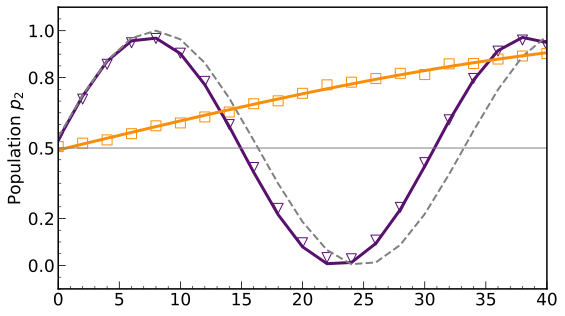

In [109]:
a1, p1 = sol_1.x
a6, p6 = sol_6.x
a2, p2 = sol_2.x

N_list = np.array([2*n for n in range(re_params[0]['N0'])])

# sim 1
pop2_sim1_ap = pop_sim(a1, p1)
a0=0.015
pop2_sim1_a = pop_sim(a1+a0, 0)

# sim 6
pop2_sim6_ap = pop_sim(a6, p6)

# sim 2
pop2_sim2_ap = pop_sim(a2, p2)

s0 = 100
lw0 = 3.0
fig, ax = plt.subplots(ncols=1, figsize=(8, 4.5))

ax.scatter(N_list, re_pops_2[0], facecolor='none', edgecolors='#57106e', s=s0, label='Un-corrected', marker='v')
ax.plot(N_list, pop2_sim1_ap[:, 1], color='#57106e', linewidth=lw0)
ax.plot(N_list, pop2_sim1_a[:, 1], color='grey', linewidth=2.0, linestyle='--')

ax.scatter(N_list, re_pops_2[5], facecolor='none', edgecolors='#f98e09', s=s0, label=r'Amplitude scaling', marker='s')
ax.plot(N_list, pop2_sim6_ap[:, 1], color='#f98e09', linewidth=lw0)

# ax.scatter(N_list, re_pops_1[2], facecolor='none', edgecolors=my_discrete[4], s=s0, label='DRAG $Y$-correction')
# ax.plot(N_list, pop2_sim2_ap[:, 1], color=my_discrete[4], linewidth=lw0)

# re_pops_subset = np.array([re_pops_2[2], re_pops_2[3], re_pops_2[4]])
# mean_re_pops = np.mean(re_pops_subset, axis=0)
# std_re_pops = np.std(re_pops_subset, axis=0)
ax.axhline(0.5, color='grey', linewidth=1.0)
# ax.plot(N_list, mean_re_pops, color=my_discrete[3], linewidth=0.5)
# ax.fill_between(N_list, mean_re_pops - std_re_pops, mean_re_pops + std_re_pops, color='grey', alpha=0.1)
# ax.scatter(N_list, mean_re_pops, facecolor=my_discrete[3], edgecolor='none', s=s0, marker='s', label='Both corrections')

ax.set_xlim([0, 40])
ax.set_yticks(np.round(np.linspace(0, 1.0, 5), 1))
ax.set_ylim([-0.1, 1.1])
ax.set_ylabel(r'Population $p_2$',fontsize=17)

ax.tick_params(axis='both', labelsize=17, direction='in', which='both')
ax.tick_params(axis='both', which='major', length=7.5)
ax.tick_params(axis='both', which='minor', length=3)
ax.minorticks_on()
fig.tight_layout()
fig.savefig('fig1_re_a.png', dpi=300)

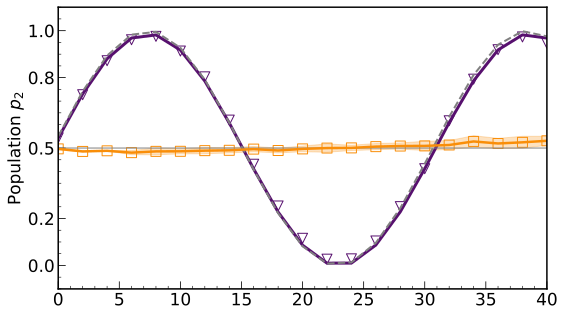

In [121]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 4.5))

ax.scatter(N_list, re_pops_2[1], facecolor='none', edgecolors='#57106e', s=s0, label='DRAG $Y$-correction', marker='v')
ax.plot(N_list, pop2_sim2_ap[:, 1], color='#57106e', linewidth=lw0)
a0=0.012
pop2_sim2_a = pop_sim(a2+a0, 0)
ax.plot(N_list, pop2_sim2_a[:, 1], color='grey', linewidth=2.0, linestyle='--')

re_pops_subset = np.array([re_pops_2[2], re_pops_2[3], re_pops_2[4]])
mean_re_pops = np.mean(re_pops_subset, axis=0)
std_re_pops = np.std(re_pops_subset, axis=0)
ax.axhline(0.5, color='grey', linewidth=1.0)
ax.plot(N_list, mean_re_pops, color='#f98e09', linewidth=2.5)
ax.fill_between(N_list, mean_re_pops - std_re_pops, mean_re_pops + std_re_pops, color='#f98e09', alpha=0.25)
ax.scatter(N_list, mean_re_pops, facecolor='none', edgecolor='#f98e09', s=s0, marker='s', label='Both corrections')

ax.set_xlim([0, 40])
ax.set_yticks(np.round(np.linspace(0, 1.0, 5), 1))
ax.set_ylim([-0.1, 1.1])
ax.set_ylabel(r'Population $p_2$',fontsize=17)


ax.tick_params(axis='both', labelsize=17, direction='in', which='both')
ax.tick_params(axis='both', which='major', length=7.5)
ax.tick_params(axis='both', which='minor', length=3)
ax.minorticks_on()
fig.tight_layout()
fig.savefig('fig1_re_b.png', dpi=300)

In [124]:
a1, p1

(0.07821578907577786, 0.27401691973825815)

In [125]:
a2, p2

(0.08880848156264348, 0.195607016272562)

# Figure 2. APE

In [126]:
ape_ids = ['cw0sjvk79ws0008z27j0', 'cw0t1qe4v2e0008sfxeg', 'cw0twskjz3x0008j6xx0', 'cw0v84079ws0008z2as0']
paths = [f"./calibrator/phase_error1/data/{id}" for id in ape_ids]
pe_iq_datas = [np.array(np.load(f"{p}/iq_data.pkl", allow_pickle=True)) for p in paths]
pe_params = [np.array(np.load(f"{p}/params.pkl", allow_pickle=True)) for p in paths]

In [127]:
pe_params

[array({'pe_job_id_string': 'cw0sjvk79ws0008z27j0', 'datetime': datetime.datetime(2024, 10, 5, 21, 54, 33, 953509), 'duration': 40, 'amp': 0.2513636363636364, 'optimized_beta': 0, 'num_points': 150, 'num_shots': 5000, 'rep_range': [1, 3], 'delay_overlap': True, 'mapping_01': True, 'rep_delay': '0.0005', 'extended_delay': '0.0', 'idling_circuits': False, 'unconditional_reset12': True},
       dtype=object),
 array({'pe_job_id_string': 'cw0t1qe4v2e0008sfxeg', 'datetime': datetime.datetime(2024, 10, 5, 22, 26, 10, 66884), 'duration': 40, 'amp': 0.2513636363636364, 'optimized_beta': 0, 'num_points': 150, 'num_shots': 5000, 'rep_range': [5, 7], 'delay_overlap': True, 'mapping_01': True, 'rep_delay': '0.0005', 'extended_delay': '0.0', 'idling_circuits': False, 'unconditional_reset12': True},
       dtype=object),
 array({'pe_job_id_string': 'cw0twskjz3x0008j6xx0', 'datetime': datetime.datetime(2024, 10, 5, 23, 23, 56, 41583), 'duration': 40, 'amp': 0.2513636363636364, 'optimized_beta': -0.41

In [128]:
angle_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, 75)

pe_pops = []

for iq_data in pe_iq_datas:
    _, _, pe_pop = discriminate(iq_data)
    pe_pops.append(pe_pop)
pe_pops = np.array(pe_pops)

In [129]:
pe_pops.shape

(4, 150, 3)

In [132]:
pe_pops = np.reshape(pe_pops, (8, 75, 3))

In [133]:
def ape_plus(a, p):
    return (-1j*((np.pi/2+a)/2)*Lx12()-1j*(p/2)*Lz12()).expm() 

def ape_minus(a, p):
    return (-1j*((-np.pi/2-a)/2)*Lx12()-1j*(p/2)*Lz12()).expm() 

def obj_ape(args):

    a, p = args
    pop1_sim = []
    for angle in angle_swept:
        psi0 = ket1 
        psi0 = ape_plus(a, p)*psi0
        for j in range(rep):
            psi0 = ape_minus(-a, p)*ape_plus(a, p)*psi0 
        psi0 = R12(-np.pi/2-a, angle)*psi0
        pop1 = (np.abs(ket1.dag()*psi0))**2
        pop1_sim.append(pop1)

    pop1_sim = np.array(pop1_sim)
    pop_dif = np.abs(pop1_sim - pop1_exp)**2
    print(np.average(pop_dif))

    return np.average(pop_dif)


def pop_sim_ape(a, p, rep):
    pop1_sim = []
    for angle in angle_swept:
        psi0 = ket1 
        psi0 = ape_plus(a, p)*psi0
        for j in range(rep):
            psi0 = ape_minus(-a, p)*ape_plus(a, p)*psi0 
        psi0 = R12(-np.pi/2-a, angle)*psi0
        pop1 = (np.abs(ket1.dag()*psi0))**2
        pop1_sim.append(pop1)

    pop1_sim = np.array(pop1_sim)
    return pop1_sim

guess_ape = [5e-2, 5e-2]
idx = 0
solutions_ape = []
for rep in [1, 3, 5, 7]:
    pop1_exp = pe_pops[idx][:, 0]
    sol_ape = minimize(obj_ape, guess_ape, method='Nelder-Mead', tol=1e-9)
    idx += 1
    solutions_ape.append(sol_ape)

0.00016224401392312082
0.00015784844878275205
0.00016267564940404983
0.0001623830042174065
0.00016054842330268012
0.0001566610746537923
0.00015513032730215994
0.00015197345131694564
0.00014893443861330644
0.00015089941074895838
0.0001478044612240841
0.00015207359193941526
0.0001457713498297926
0.00014657689185107394
0.00014836913505680661
0.00014647535418471112
0.0001458065696855103
0.0001495252356232128
0.00014543339974779453
0.00014638916486442937
0.00014547761122062877
0.0001455140235114667
0.00014536207319898378
0.00014590213846108797
0.00014535146063851252
0.00014542678672826341
0.00014536142586430166
0.00014543891213433875
0.00014534324893552517
0.0001453525959231549
0.0001453433744359312
0.00014535266710940977
0.00014534299255593457
0.00014534701166246626
0.00014534089894255105
0.00014535528407621116
0.0001453405526144442
0.00014534143080913487
0.00014534047127159143
0.0001453423805970211
0.00014534037505754547
0.00014534054592262635
0.00014534038419295803
0.00014534070439993106

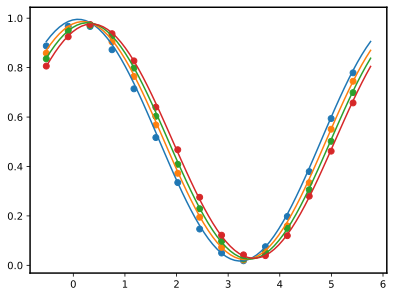

In [134]:
rep_range = [1, 3, 5, 7]
for i in range(4):
    plt.scatter(angle_swept[::5], pe_pops[i][:, 0][::5])
    plt.plot(angle_swept, pop_sim_ape(solutions_ape[i].x[0], solutions_ape[i].x[1], rep=rep_range[i]))

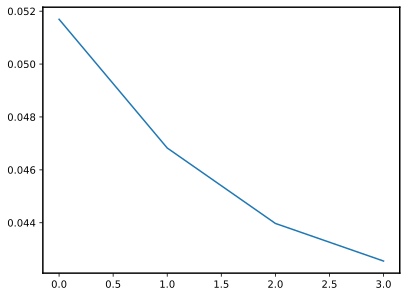

In [136]:
plt.plot([0.05169382617458747, 0.04682551356577483, 0.043973255965181625, 0.042550758768561014])

In [258]:
delta_fit_using_eqn1 = np.array([0.05169382617458747, 0.04682551356577483, 0.043973255965181625, 0.042550758768561014])

np.mean(delta_fit_using_eqn1), np.std(delta_fit_using_eqn1)

(0.046260838618526236, 0.0034940641976560593)

In [259]:
0.34*1e-2

0.0034000000000000002

In [137]:
pe_fits = []
init_phases = []

for pop in pe_pops:
    pop = pop[:, 0]
    popt, yfit, pcov = ut.fit_function(angle_swept, 
                                    pop, 
                                    lambda x, A, B, phi: (A*np.cos(x+phi)+B), 
                                    [0.5, 0, 0])
    pe_fits.append(yfit)
    init_phases.append(popt[-1])

/var/folders/z6/rm3bbyf1499dhyn1b2tcy4s80000gn/T/ipykernel_18642/3704838655.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  inferno_cmap = cm.get_cmap('inferno')  # Get the full inferno colormap


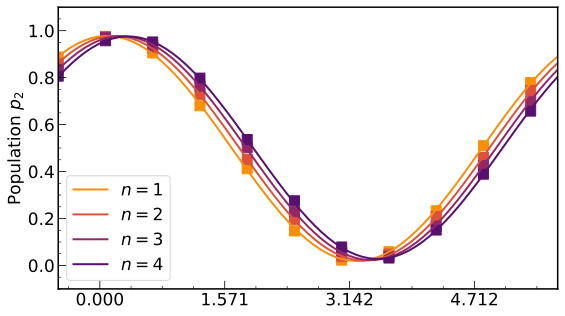

In [303]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig, axes = plt.subplots(nrows=1, figsize=(8, 4.5))

# Define the custom colormap as a subset of inferno
inferno_cmap = cm.get_cmap('inferno')  # Get the full inferno colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_inferno", [inferno_cmap(0.88), inferno_cmap(0.25)])  # Subset

# Sample 4 colors from the gradient
my_discrete = ['#f98e09', '#dd513a', '#932667', '#57106e']

skip_point_1 = 7
skip_point_2 = 4

lw0 = 2.0
for idx in range(4):
    clr = my_discrete[idx]
    axes.scatter(angle_swept[::skip_point_1], pe_pops[idx][:, 0][::skip_point_1], color=clr, marker='s', s=s0)
    axes.plot(angle_swept, pe_fits[idx], color=clr, linewidth=lw0, label=rf'$n={idx+1}$')
    # axes[0, 1].scatter(angle_swept[::skip_point_2], pe_pops[idx][:, 0][::skip_point_2], color=clr, marker='s')
    # axes[0, 1].plot(angle_swept, pe_fits[idx], color=clr)

axes.set_xlim([min(angle_swept), max(angle_swept)])
# axes[0, 1].set_xlim([np.pi-np.pi/5, np.pi+np.pi/5])
axes.set_ylim([-0.1, 1.1])
axes.legend(fontsize=17)
# axes[0, 1].set_ylim([0, 0.2])

# for idx in range(4):
#     jdx = idx+4
#     clr = my_discrete[idx]
#     axes[1].scatter(angle_swept[::skip_point_1], pe_pops[jdx][:, 0][::skip_point_1], color=clr, marker='s', s=s0)
#     axes[1].plot(angle_swept, pe_fits[jdx], color=clr, linewidth=lw0)
#     axes[1].plot(angle_swept, pe_fits[idx], color='grey', linewidth=0.25)
#     # axes[1, 1].scatter(angle_swept[::skip_point_2], pe_pops[jdx][:, 0][::skip_point_2], color=clr, marker='s')
#     # axes[1, 1].plot(angle_swept, pe_fits[jdx], color=clr)
#     # axes[1, 1].plot(angle_swept, pe_fits[idx], color='grey', linewidth=0.25)

# axes[1].set_xlim([min(angle_swept), max(angle_swept)])
# # axes[1, 1].set_xlim([np.pi-np.pi/5, np.pi+np.pi/5])
# axes[1].set_ylim([0, 1.0])
# # axes[1, 1].set_ylim([0, 0.2])

my_xticks = [0, np.pi/2, np.pi, 3*np.pi/2]
axes.set_xticks(my_xticks)

axes.tick_params(axis='both', labelsize=17, direction='in', which='both')
axes.minorticks_on()
axes.tick_params(axis='both', which='major', length=8)
axes.tick_params(axis='both', which='minor', length=3)

axes.set_ylabel(r'Population $p_2$', fontsize=17)

fig.tight_layout()
fig.savefig('fig2_ape_1.png',dpi=300)

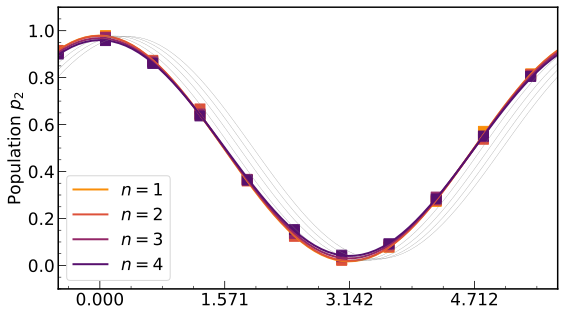

In [304]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig, axes = plt.subplots(nrows=1, figsize=(8, 4.5))


skip_point_1 = 7
skip_point_2 = 4
# for idx in range(4):
#     clr = my_discrete[idx]
#     axes.scatter(angle_swept[::skip_point_1], pe_pops[idx][:, 0][::skip_point_1], color=clr, marker='s', s=s0)
#     axes.plot(angle_swept, pe_fits[idx], color=clr, linewidth=lw0)
#     # axes[0, 1].scatter(angle_swept[::skip_point_2], pe_pops[idx][:, 0][::skip_point_2], color=clr, marker='s')
#     # axes[0, 1].plot(angle_swept, pe_fits[idx], color=clr)

# axes.set_xlim([min(angle_swept), max(angle_swept)])
# # axes[0, 1].set_xlim([np.pi-np.pi/5, np.pi+np.pi/5])
# axes.set_ylim([0, 1.0])
# # axes[0, 1].set_ylim([0, 0.2])

for idx in range(4):
    jdx = idx+4
    clr = my_discrete[idx]
    axes.scatter(angle_swept[::skip_point_1], pe_pops[jdx][:, 0][::skip_point_1], color=clr, marker='s', s=s0)
    axes.plot(angle_swept, pe_fits[jdx], color=clr, linewidth=lw0, label=rf'$n={idx+1}$')
    axes.plot(angle_swept, pe_fits[idx], color='grey', linewidth=0.25)
    # axes[1, 1].scatter(angle_swept[::skip_point_2], pe_pops[jdx][:, 0][::skip_point_2], color=clr, marker='s')
    # axes[1, 1].plot(angle_swept, pe_fits[jdx], color=clr)
    # axes[1, 1].plot(angle_swept, pe_fits[idx], color='grey', linewidth=0.25)
axes.legend(fontsize=17)
axes.set_xlim([min(angle_swept), max(angle_swept)])
# axes[1, 1].set_xlim([np.pi-np.pi/5, np.pi+np.pi/5])
axes.set_ylim([-0.1, 1.1])
# axes[1, 1].set_ylim([0, 0.2])


my_xticks = [0, np.pi/2, np.pi, 3*np.pi/2]
axes.set_xticks(my_xticks)


axes.tick_params(axis='both', labelsize=17, direction='in', which='both')
axes.minorticks_on()
axes.tick_params(axis='both', which='major', length=8)
axes.tick_params(axis='both', which='minor', length=3)

axes.set_ylabel(r'Population $p_2$', fontsize=17)

fig.tight_layout()
fig.savefig('fig2_ape_2.png',dpi=300)

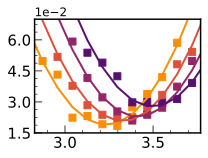

In [305]:
fig, ax = plt.subplots(figsize=(3, 2.3))
skip_point_3 = 1
for idx in range(4):
    clr = my_discrete[idx]
    ax.scatter(angle_swept[::skip_point_3], pe_pops[idx][:, 0][::skip_point_3], color=clr, marker='s', s=50)
    ax.plot(angle_swept, pe_fits[idx], color=clr, linewidth=lw0)

ax.set_xlim([np.pi-np.pi/10, np.pi+np.pi/5])
ax.set_ylim([0.015, 0.07])
ax.tick_params(axis='both', labelsize=15, direction='in', which='both')
ax.minorticks_on()
ax.tick_params(axis='both', which='major', length=7.5)
ax.tick_params(axis='both', which='minor', length=3)
ax.set_yticks(np.arange(0.015, 0.07, 0.015))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.offsetText.set_fontsize(12)

fig.tight_layout()
fig.savefig('fig2_ape_inset1.png', dpi=300, transparent=True)

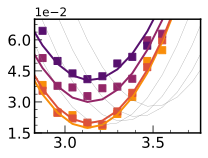

In [306]:
fig, ax = plt.subplots(figsize=(3, 2.3))
skip_point_3 = 1
for idx in range(4):
    jdx = idx+4
    clr = my_discrete[idx]
    ax.scatter(angle_swept[::skip_point_3], pe_pops[jdx][:, 0][::skip_point_3], color=clr, marker='s', s=50)
    ax.plot(angle_swept, pe_fits[jdx], color=clr, linewidth=lw0)
    ax.plot(angle_swept, pe_fits[idx], color='grey', linewidth=0.25)

ax.set_xlim([np.pi-np.pi/10, np.pi+np.pi/5])
ax.set_ylim([0.015, 0.07])
ax.tick_params(axis='both', labelsize=15, direction='in', which='both')
ax.minorticks_on()
ax.tick_params(axis='both', which='major', length=7.5)
ax.tick_params(axis='both', which='minor', length=3)
ax.set_yticks(np.arange(0.015, 0.07, 0.015))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.yaxis.offsetText.set_fontsize(12)
fig.tight_layout()
fig.savefig('fig2_ape_inset2.png', dpi=300, transparent=True)

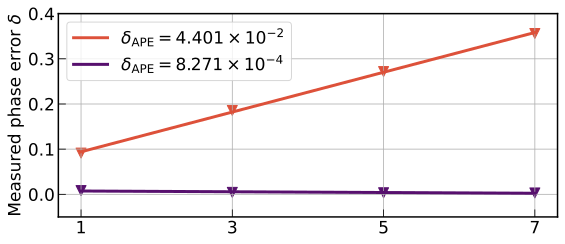

In [297]:
fig, axes = plt.subplots(figsize=(8, 3.5))

# Fit functions for linear fitting on each dataset
poplin1, linearfit1, _ = ut.fit_function(np.array([1, 3, 5, 7]), 
                                np.abs(init_phases[:4]), 
                                lambda x, A, B: (A * x + B), 
                                [0.5, 0.1])

poplin2, linearfit2, _ = ut.fit_function(np.array([1, 3, 5, 7]), 
                                np.abs(init_phases[4:]), 
                                lambda x, A, B: (A * x + B), 
                                [0, 0])

# Scatter and plot for the first set of data
plt.scatter([1, 3, 5, 7], np.abs(init_phases[:4]), s=s0, marker='v', color=my_discrete[1])
plt.plot([1, 3, 5, 7], linearfit1, color=my_discrete[1], label=r'$\delta_{\text{APE}}=4.401\times 10^{-2}$', linewidth=lw0)

# Scatter and plot for the second set of data
plt.scatter([1, 3, 5, 7], np.abs(init_phases[4:]), s=s0, marker='v', color=my_discrete[3])
plt.plot([1, 3, 5, 7], linearfit2, color=my_discrete[3], label=r'$\delta_{\text{APE}}=8.271\times 10^{-4}$', linewidth=lw0)

# # Set label and tick positions
# axes.xaxis.set_label_position('top')
# axes.xaxis.set_ticks_position('top')
# axes.yaxis.set_label_position('right')
# axes.yaxis.set_ticks_position('right')

# Grid and tick settings, with tick labels inside
# axes.tick_params(axis='x', labelsize=15, direction='in', labeltop=True, pad=-25)
# axes.tick_params(axis='y', labelsize=15, direction='in', labelright=True, pad=-35)
axes.tick_params(axis='both', which='major', length=7.5)
axes.tick_params(axis='both', which='minor', length=3)
axes.set_yticks(np.round(np.linspace(0, 0.4, 5), 1))
axes.set_xticks(np.round(np.linspace(1, 7, 4), 1))
axes.set_ylim(-0.05, 0.4)

# Legend on top of the plot
axes.legend(fontsize=17)
axes.tick_params(axis='both', labelsize=17, direction='in', which='both')
axes.set_ylabel('Measured phase error $\delta$', fontsize=17)
axes.grid()
# Save figure
fig.tight_layout()
fig.savefig('fig2_ape_inset.png', dpi=300, transparent=True)

In [298]:
poplin1, poplin2

(array([0.04401724, 0.05014399]), array([-0.00082709,  0.00817537]))

In [299]:
8.271*1e-4

0.0008271000000000001

# Fig 2. DRAPE

In [300]:
drape1_id = 'cwhsrpt0r6b0008pqb90'
drape2_id = 'cwhvkgy543p00086em8g'

exp_ids = [drape1_id, drape2_id]

paths = []
for id in exp_ids:
    paths.append(f"./calibrator/drag/data/{id}")

ad_iq_datas = []
ad_params = []
drape_pops = []

for path in paths:
    ad_iq_datas.append(np.array(np.load(f"{path}/iq_data.pkl", allow_pickle=True)))
    ad_params.append(np.load(f"{path}/params.pkl", allow_pickle=True))

for iq_data in ad_iq_datas:
    _, _, drape_pop = discriminate(iq_data)
    drape_pops.append(drape_pop)

drape_pops = np.array(drape_pops)

In [301]:
drape_pops = np.reshape(drape_pops, (6, 50, 3))
beta_swept = np.linspace(ad_params[0]['beta_min'], ad_params[0]['beta_max'], ad_params[0]['num_betas'])

for i in range(drape_pops.shape[0]): 
    if i > 2:
        drape_pops[i][:, 2] += 0.015

y_fit_pops = []
popt_pops = []

for pop in drape_pops:
    popt, yfit, pcov = ut.fit_function(beta_swept, 
                                    pop[:, 2], 
                                    lambda x, A, B: (A*x+B), 
                                    [-0.5, 0])
    y_fit_pops.append(yfit)
    popt_pops.append(popt)

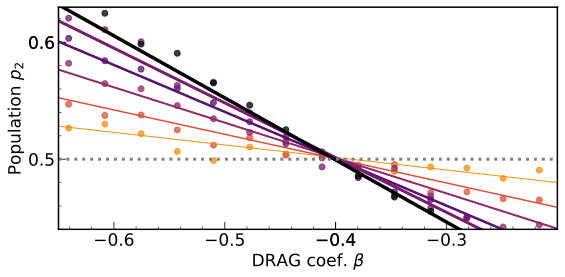

In [312]:
fig, ax = plt.subplots(figsize=(8, 4))
my_discrete = ['#f98e09', '#dd513a', '#932667', '#57106e', '#781c6d', '#000004']
j = 1.0
for i in range(drape_pops.shape[0]): 
    ax.scatter(beta_swept[::2], drape_pops[i][:, 2][::2], alpha=0.75, color=my_discrete[i])
    ax.plot(beta_swept, y_fit_pops[i], label=f'{i}', linewidth=j, color=my_discrete[i])
    j+=0.5

ax.axhline(0.5, linewidth=3.0, linestyle='dotted', color='grey')

ax.tick_params(axis='both', labelsize=17, direction='in', which='both')
ax.minorticks_on()
ax.tick_params(axis='both', which='major', length=7.5)
ax.tick_params(axis='both', which='minor', length=3)
ax.set_xticks(np.round(np.linspace(-0.60, -0.3, 5), 1))
ax.set_yticks(np.round(np.linspace(0.45, 0.60, 4), 1))
ax.set_ylim([0.44, 0.63])
ax.set_xlim([-0.65, -0.2])
ax.set_ylabel(r'Population $p_2$', fontsize=17)
ax.set_xlabel(r'DRAG coef. $\beta$', fontsize=17)

fig.tight_layout()
fig.savefig('drape.png',dpi=300, transparent=True)